# NBA Players by Decade EDA

## Scraping Data From NBA Reference

In [3]:
import requests
import string

In [2]:
letters = list(string.ascii_lowercase)
url_start = "https://www.basketball-reference.com/players/{}/"

for letter in letters:
    url = url_start.format(letter)    
    data = requests.get(url)
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Players_A_Z\{}.html".format(letter), "w+", encoding="utf-8") as f:
        f.write(data.text)
        

In [2]:
!pip install beautifulsoup4

In [4]:
from bs4 import BeautifulSoup

In [5]:
with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Players_A_Z\a.html", encoding="utf-8") as f:
    page = f.read()

In [6]:
soup = BeautifulSoup(page,"html.parser")

In [7]:
players_A_table = soup.find(id="players")

In [5]:
import pandas as pd

In [9]:
players_A = pd.read_html(str(players_A_table))[0]

In [10]:
players_A

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240,"June 24, 1968",Duke
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235,"April 7, 1946",Iowa State
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225,"April 16, 1947",UCLA
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162,"March 9, 1969",LSU
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223,"November 3, 1974","Michigan, San Jose State"
...,...,...,...,...,...,...,...,...
170,Gustavo Ayón,2012,2014,C,6-10,250,"April 1, 1985",NaN
171,Jeff Ayres,2010,2016,F,6-9,240,"April 29, 1987",Arizona State
172,Deandre Ayton,2019,2022,C,6-11,250,"July 23, 1998",Arizona
173,Kelenna Azubuike,2007,2012,G,6-5,220,"December 16, 1983",Kentucky


In [11]:
players_dfs = []
for letter in letters:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Players_A_Z\{}.html".format(letter), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    players_table = soup.find(id="players")
    players = pd.read_html(str(players_table))[0]
    
    players_dfs.append(players)

In [12]:
players_df = pd.concat(players_dfs)

In [13]:
#Convert height to inches for easier analysis
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_

new_df = players_df.assign(Ht = players_df["Ht"].apply(lambda x:parse_ht(x)))

In [14]:
new_df.drop(['Birth Date','Colleges'], axis=1)

,Player,From,To,Pos,Ht,Wt
0,Alaa Abdelnaby,1991,1995,F-C,82.0,240
1,Zaid Abdul-Aziz,1969,1978,C-F,81.0,235
2,Kareem Abdul-Jabbar*,1970,1989,C,86.0,225
3,Mahmoud Abdul-Rauf,1991,2001,G,73.0,162
4,Tariq Abdul-Wahad,1998,2003,F,78.0,223
...,...,...,...,...,...,...
15,Ante Žižić,2018,2020,F-C,82.0,266
16,Jim Zoet,1983,1983,C,85.0,240
17,Bill Zopf,1971,1971,G,73.0,170
18,Ivica Zubac,2017,2022,C,84.0,240


In [15]:
players_df = new_df.reset_index(drop=True)


In [16]:
players_df = players_df.drop(['Birth Date','Colleges'], axis=1)

### Grouping Players by decade

In [17]:
df_1960 = players_df[players_df['From'].between(1960, 1969, inclusive = True)]
df_1970 = players_df[players_df['From'].between(1970, 1979, inclusive = True)]
df_1980 = players_df[players_df['From'].between(1980, 1989, inclusive = True)]
df_1990 = players_df[players_df['From'].between(1990, 1999, inclusive = True)]
df_2000 = players_df[players_df['From'].between(2000, 2009, inclusive = True)]
df_2010 = players_df[players_df['From'].between(2010, 2019, inclusive = True)]

C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\4002261387.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_1960 = players_df[players_df['From'].between(1960, 1969, inclusive = True)]
C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\4002261387.py:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_1970 = players_df[players_df['From'].between(1970, 1979, inclusive = True)]
C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\4002261387.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_1980 = players_df[players_df['From'].between(1980, 1989, inclusive = True)]
C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\4002261387.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  df_1990 = players_df[players_df['From'].between(1990, 1999,

In [18]:
df_1960.describe()

,Ht
count,479.000000
mean,77.296451
std,3.202347
min,63.000000
25%,75.000000
50%,77.000000
75%,80.000000
max,87.000000


## Now I will use the same method to get the team data from each decade

In [19]:
years = list(range(1960,2020))
url_start = "https://www.basketball-reference.com/leagues/NBA_{}.html"

for year in years:
    url = url_start.format(year)    
    data = requests.get(url)
    
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)
        

In [20]:
with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\1960.html", encoding="utf-8") as f:
    page = f.read()

In [21]:
soup = BeautifulSoup(page,"html.parser")

In [22]:
teams_table = soup.find(id="per_game-team")

In [23]:
teams = pd.read_html(str(teams_table))[0]
teams

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Boston Celtics*,75,NaN,49.9,119.6,0.417,NaN,NaN,NaN,...,0.734,NaN,NaN,80.2,24.7,NaN,NaN,NaN,24.7,124.5
1,2.0,Syracuse Nationals*,75,NaN,45.4,109.8,0.414,NaN,NaN,NaN,...,0.791,NaN,NaN,72.1,22.3,NaN,NaN,NaN,25.9,118.9
2,3.0,Philadelphia Warriors*,75,NaN,47.3,115.7,0.409,NaN,NaN,NaN,...,0.669,NaN,NaN,78.9,23.9,NaN,NaN,NaN,22.9,118.6
3,4.0,New York Knicks,75,NaN,45.7,108.7,0.421,NaN,NaN,NaN,...,0.765,NaN,NaN,70.0,22.2,NaN,NaN,NaN,25.9,117.3
4,5.0,St. Louis Hawks*,75,NaN,42.4,101.1,0.419,NaN,NaN,NaN,...,0.745,NaN,NaN,71.2,25.1,NaN,NaN,NaN,26.6,113.4
5,6.0,Detroit Pistons*,75,NaN,41.9,105.6,0.397,NaN,NaN,NaN,...,0.729,NaN,NaN,73.2,19.6,NaN,NaN,NaN,26.4,111.6
6,7.0,Cincinnati Royals,75,NaN,42.8,103.8,0.412,NaN,NaN,NaN,...,0.716,NaN,NaN,70.0,23.3,NaN,NaN,NaN,28.0,111.1
7,8.0,Minneapolis Lakers*,75,NaN,40.5,105.1,0.386,NaN,NaN,NaN,...,0.730,NaN,NaN,72.4,19.3,NaN,NaN,NaN,24.2,107.3
8,NaN,League Average,75,NaN,44.5,108.7,0.410,NaN,NaN,NaN,...,0.735,NaN,NaN,73.5,22.6,NaN,NaN,NaN,25.6,115.3


In [24]:
teams_dfs = []
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="per_game-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    teams_dfs.append(teams)

In [25]:
teams_df = pd.concat(teams_dfs)

In [26]:
teams_df.shape

(1445, 26)

## After sorting the data into decades, I want to compare certain factors of each championship team of the decade against the average of the whole decade. Determine the biggest factors such as height, how many fts, fga, etc. for the championship team. 

In [27]:
df_1960.head()

,Player,From,To,Pos,Ht,Wt
1,Zaid Abdul-Aziz,1969,1978,C-F,81.0,235
14,Bud Acton,1968,1968,F,78.0,210
27,Rick Adelman*,1969,1975,G,73.0,175
34,Matthew Aitch,1968,1968,F,79.0,230
36,Henry Akin,1967,1969,C-F,82.0,225


In [28]:
height60mean = df_1960['Ht'].mean()
height60median = df_1960['Ht'].median()
height70mean = df_1970['Ht'].mean()
height70median = df_1970['Ht'].median()
height80mean = df_1980['Ht'].mean()
height80median = df_1980['Ht'].median()
height90mean = df_1990['Ht'].mean()
height90median = df_1990['Ht'].median()
height00mean = df_2000['Ht'].mean()
height00median = df_2000['Ht'].median()
height10mean = df_2010['Ht'].mean()
height10median = df_2010['Ht'].median()

In [29]:
height60mean

77.2964509394572

In [30]:
height60median

77.0

In [163]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Height in Inches')

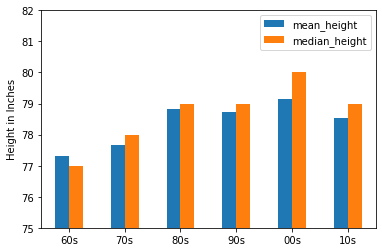

In [32]:
mean_heights = [height60mean, height70mean, height80mean, height90mean, height00mean, height10mean]
median_heights = [height60median, height70median, height80median, height90median, height00median, height10median]
index = ['60s','70s','80s','90s','00s','10s']
height_df = pd.DataFrame({'mean_height': mean_heights, 'median_height':median_heights}, index=index)
height_df.plot.bar(rot=0)
plt.ylim(75,82)
plt.ylabel("Height in Inches")

We can see that the average height of the league has increased significantly since the 60s and then appears to fall a bit during the 2010s. Did championship teams have a significant height advantage over the league average?

In [147]:
#Getting League Totals for each decade
#1960s
team_total_60s = []
years = list(range(1960,1970))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_60s.append(teams)

In [148]:
team_total_60s = pd.concat(team_total_60s)


In [149]:
league_avg_60s = team_total_60s.loc[team_total_60s['Team'] == 'League Average']

In [150]:
team_total_70s = []
years = list(range(1970,1980))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_70s.append(teams)
team_total_70s = pd.concat(team_total_70s)
league_avg_70s = team_total_70s.loc[team_total_70s['Team'] == 'League Average']

In [145]:
team_total_80s = []
years = list(range(1980,1990))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_80s.append(teams)
team_total_80s = pd.concat(team_total_80s)
league_avg_80s = team_total_80s.loc[team_total_80s['Team'] == 'League Average']

In [151]:
team_total_90s = []
years = list(range(1990,2000))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_90s.append(teams)
team_total_90s = pd.concat(team_total_90s)
league_avg_90s = team_total_90s.loc[team_total_90s['Team'] == 'League Average']

In [152]:
team_total_00s = []
years = list(range(2000,2010))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_00s.append(teams)
team_total_00s = pd.concat(team_total_00s)
league_avg_00s = team_total_00s.loc[team_total_00s['Team'] == 'League Average']

In [153]:
team_total_10s = []
years = list(range(2010,2020))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="totals-team")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    team_total_10s.append(teams)
team_total_10s = pd.concat(team_total_10s)
league_avg_10s = team_total_10s.loc[team_total_10s['Team'] == 'League Average']

In [41]:
league_avg_60s.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

## Let's Take a look at trends in major stats across different decades

In [42]:
#Total Rebounds by decade
rebound60mean = league_avg_60s['TRB'].mean()
rebound60median = league_avg_60s['TRB'].median()
rebound70mean = league_avg_70s['TRB'].mean()
rebound70median = league_avg_70s['TRB'].median()
rebound80mean = league_avg_80s['TRB'].mean()
rebound80median = league_avg_80s['TRB'].median()
rebound90mean = league_avg_90s['TRB'].mean()
rebound90median = league_avg_90s['TRB'].median()
rebound00mean = league_avg_00s['TRB'].mean()
rebound00median = league_avg_00s['TRB'].median()
rebound10mean = league_avg_10s['TRB'].mean()
rebound10median = league_avg_10s['TRB'].median()


In [43]:
#Total FT by decade
FT60mean = league_avg_60s['FT'].mean()
FT60median = league_avg_60s['FT'].median()
FT70mean = league_avg_70s['FT'].mean()
FT70median = league_avg_70s['FT'].median()
FT80mean = league_avg_80s['FT'].mean()
FT80median = league_avg_80s['FT'].median()
FT90mean = league_avg_90s['FT'].mean()
FT90median = league_avg_90s['FT'].median()
FT00mean = league_avg_00s['FT'].mean()
FT00median = league_avg_00s['FT'].median()
FT10mean = league_avg_10s['FT'].mean()
FT10median = league_avg_10s['FT'].median()

In [44]:
#Total 2 points made by decade
twoP60mean = league_avg_60s['2P'].mean()
twoP60median = league_avg_60s['2P'].median()
twoP70mean = league_avg_70s['2P'].mean()
twoP70median = league_avg_70s['2P'].median()
twoP80mean = league_avg_80s['2P'].mean()
twoP80median = league_avg_80s['2P'].median()
twoP90mean = league_avg_90s['2P'].mean()
twoP90median = league_avg_90s['2P'].median()
twoP00mean = league_avg_00s['2P'].mean()
twoP00median = league_avg_00s['2P'].median()
twoP10mean = league_avg_10s['2P'].mean()
twoP10median = league_avg_10s['2P'].median()

In [45]:
#Total 3 points made by decade
threeP60mean = league_avg_60s['3P'].mean()
threeP60median = league_avg_60s['3P'].median()
threeP70mean = league_avg_70s['3P'].mean()
threeP70median = league_avg_70s['3P'].median()
threeP80mean = league_avg_80s['3P'].mean()
threeP80median = league_avg_80s['3P'].median()
threeP90mean = league_avg_90s['3P'].mean()
threeP90median = league_avg_90s['3P'].median()
threeP00mean = league_avg_00s['3P'].mean()
threeP00median = league_avg_00s['3P'].median()
threeP10mean = league_avg_10s['3P'].mean()
threeP10median = league_avg_10s['3P'].median()

In [70]:
twoPA60mean = league_avg_60s['2PA'].mean()
twoPA60median = league_avg_60s['2PA'].median()
twoPA70mean = league_avg_70s['2PA'].mean()
twoPA70median = league_avg_70s['2PA'].median()
twoPA80mean = league_avg_80s['2PA'].mean()
twoPA80median = league_avg_80s['2PA'].median()
twoPA90mean = league_avg_90s['2PA'].mean()
twoPA90median = league_avg_90s['2PA'].median()
twoPA00mean = league_avg_00s['2PA'].mean()
twoPA00median = league_avg_00s['2PA'].median()
twoPA10mean = league_avg_10s['2PA'].mean()
twoPA10median = league_avg_10s['2PA'].median()

In [46]:
medianrebounds = [rebound60median, rebound70median, rebound80median, rebound90median, rebound00median, rebound10median]
meanrebounds = [rebound60mean,  rebound70mean,  rebound80mean,  rebound90mean, rebound00mean, rebound10mean]

medianFT = [FT60median, FT70median, FT80median, FT90median, FT00median, FT10median]
meanFT = [FT60mean, FT70mean, FT80mean, FT90mean, FT00mean, FT10mean]

median2P = [twoP60median, twoP70median, twoP80median, twoP90median, twoP00median, twoP10median]
mean2P = [twoP60mean, twoP70mean, twoP80mean, twoP90mean, twoP00mean, twoP10mean]

median3P = [threeP60median, threeP70median, threeP80median, threeP90median, threeP00median, threeP10median]
mean3P = [threeP60mean, threeP70mean, threeP80mean, threeP90mean, threeP00mean, threeP10mean]



In [71]:
median2PA = [twoPA60median, twoPA70median, twoPA80median, twoPA90median, twoPA00median, twoPA10median]
mean2PA = [twoPA60mean, twoPA70mean, twoPA80mean, twoPA90mean, twoPA00mean, twoPA10mean]

Text(0.5, 1.0, '2 Point FGA by decade')

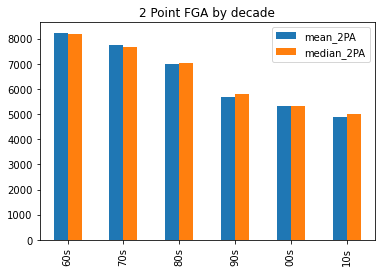

In [73]:
twoPAdf = pd.DataFrame({'mean_2PA': mean2PA, 'median_2PA': median2PA}, index=index)
twoPAdf.plot(kind='bar')
plt.title("2 Point FGA by decade")

Text(0.5, 1.0, '3 point FG by Decade')

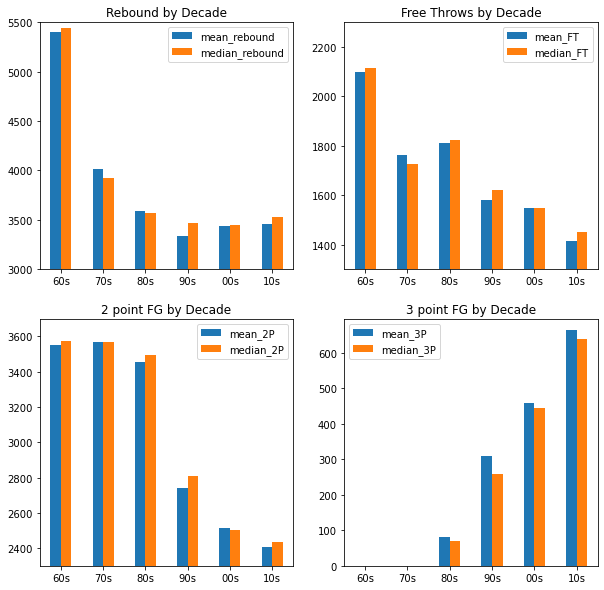

In [47]:
fig=plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

rebound_df = pd.DataFrame({'mean_rebound': meanrebounds, 'median_rebound':medianrebounds}, index=index)
FT_df = pd.DataFrame({'mean_FT': meanFT, 'median_FT':medianFT}, index=index)
twoP_df = pd.DataFrame({'mean_2P': mean2P, 'median_2P':median2P}, index=index)
threeP_df = pd.DataFrame({'mean_3P': mean3P, 'median_3P':median3P}, index=index)

rebound_df.plot.bar(rot=0, ax=ax1)
ax1.set_ylim(3000,5500)
ax1.set_title("Rebound by Decade")

FT_df.plot.bar(rot=0, ax=ax2)
ax2.set_ylim(1300,2300)
ax2.set_title("Free Throws by Decade")

twoP_df.plot.bar(rot=0, ax=ax3)
ax3.set_ylim(2300,3700)
ax3.set_title("2 point FG by Decade")

threeP_df.plot.bar(rot=0, ax=ax4)
ax4.set_title("3 point FG by Decade")


## 1960s Deep Dive

The 60s were dominated by the Boston Celtics who won 9 of 10 championships that decade. The 76ers won the other. Lets dig in and see what the biggest factors were to those championship teams


In [48]:
team_total_60s

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Boston Celtics*,75,NaN,3744,8971,0.417,NaN,NaN,NaN,...,NaN,NaN,6014,1849,NaN,NaN,NaN,1856,9337,1960
1,2.0,Syracuse Nationals*,75,NaN,3406,8232,0.414,NaN,NaN,NaN,...,NaN,NaN,5406,1676,NaN,NaN,NaN,1939,8917,1960
2,3.0,Philadelphia Warriors*,75,NaN,3549,8678,0.409,NaN,NaN,NaN,...,NaN,NaN,5916,1796,NaN,NaN,NaN,1715,8895,1960
3,4.0,New York Knicks,75,NaN,3429,8153,0.421,NaN,NaN,NaN,...,NaN,NaN,5251,1667,NaN,NaN,NaN,1940,8800,1960
4,5.0,St. Louis Hawks*,75,NaN,3179,7580,0.419,NaN,NaN,NaN,...,NaN,NaN,5343,1881,NaN,NaN,NaN,1995,8506,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11.0,New York Knicks*,82,19730.0,3588,7813,0.459,NaN,NaN,NaN,...,NaN,NaN,4246,2071,NaN,NaN,NaN,2175,9087,1969
11,12.0,Milwaukee Bucks,82,19680.0,3537,8258,0.428,NaN,NaN,NaN,...,NaN,NaN,4727,1882,NaN,NaN,NaN,2187,9040,1969
12,13.0,San Francisco Warriors*,82,19905.0,3414,8218,0.415,NaN,NaN,NaN,...,NaN,NaN,5109,1822,NaN,NaN,NaN,2087,8947,1969
13,14.0,Chicago Bulls,82,19755.0,3355,8021,0.418,NaN,NaN,NaN,...,NaN,NaN,4550,1597,NaN,NaN,NaN,2064,8587,1969


In [49]:
league_avg = team_total_60s.loc[team_total_60s['Team'] == 'League Average']
league_avg

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,NaN,League Average,75,NaN,3338,8151,0.410,NaN,NaN,NaN,...,NaN,NaN,5513,1692,NaN,NaN,NaN,1917,8650,1960
8,NaN,League Average,79,NaN,3584,8642,0.415,NaN,NaN,NaN,...,NaN,NaN,5789,1910,NaN,NaN,NaN,2121,9332,1961
9,NaN,League Average,80,NaN,3672,8619,0.426,NaN,NaN,NaN,...,NaN,NaN,5713,1915,NaN,NaN,NaN,2069,9501,1962
9,NaN,League Average,80,NaN,3568,8099,0.441,NaN,NaN,NaN,...,NaN,NaN,5338,1816,NaN,NaN,NaN,2077,9221,1963
9,NaN,League Average,80,NaN,3429,7926,0.433,NaN,NaN,NaN,...,NaN,NaN,5269,1713,NaN,NaN,NaN,2143,8880,1964
9,NaN,League Average,80,19333.0,3399,7987,0.426,NaN,NaN,NaN,...,NaN,NaN,5381,1676,NaN,NaN,NaN,2076,8849,1965
9,NaN,League Average,80,19239.0,3546,8195,0.433,NaN,NaN,NaN,...,NaN,NaN,5458,1829,NaN,NaN,NaN,2096,9241,1966
10,NaN,League Average,81,19545.0,3683,8350,0.441,NaN,NaN,NaN,...,NaN,NaN,5454,1817,NaN,NaN,NaN,2124,9513,1967
12,NaN,League Average,82,19797.0,3687,8266,0.446,NaN,NaN,NaN,...,NaN,NaN,5431,1873,NaN,NaN,NaN,2158,9562,1968
14,NaN,League Average,82,19791.0,3581,8121,0.441,NaN,NaN,NaN,...,NaN,NaN,4666,1898,NaN,NaN,NaN,2088,9210,1969


In [50]:
avg_60s = league_avg.mean(skipna = True)
avg_60s

C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\2053804894.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg_60s = league_avg.mean(skipna = True)


Rk             NaN
G          79.9000
MP      19541.0000
FG       3548.7000
FGA      8235.6000
FG%         0.4312
3P             NaN
3PA            NaN
3P%            NaN
2P       3548.7000
2PA      8235.6000
2P%         0.4312
FT       2098.6000
FTA      2892.3000
FT%         0.7258
ORB            NaN
DRB            NaN
TRB      5401.2000
AST      1813.9000
STL            NaN
BLK            NaN
TOV            NaN
PF       2086.9000
PTS      9195.9000
Year     1964.5000
dtype: float64

Lets compare how the Boston Celtics differed from the league averages and see what was a major cause to their incredible championship run.


In [51]:
celtics_60s = team_total_60s.loc[team_total_60s['Team'] == 'Boston Celtics*']
celtics_60s.reset_index(drop=True)

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Boston Celtics*,75,NaN,3744,8971,0.417,NaN,NaN,NaN,...,NaN,NaN,6014,1849,NaN,NaN,NaN,1856,9337,1960
1,3.0,Boston Celtics*,79,NaN,3699,9295,0.398,NaN,NaN,NaN,...,NaN,NaN,6131,1872,NaN,NaN,NaN,2032,9460,1961
2,3.0,Boston Celtics*,80,NaN,3855,9109,0.423,NaN,NaN,NaN,...,NaN,NaN,6080,2049,NaN,NaN,NaN,1909,9687,1962
3,3.0,Boston Celtics*,80,NaN,3746,8779,0.427,NaN,NaN,NaN,...,NaN,NaN,5818,1960,NaN,NaN,NaN,2090,9504,1963
4,2.0,Boston Celtics*,80,NaN,3619,8770,0.413,NaN,NaN,NaN,...,NaN,NaN,5736,1760,NaN,NaN,NaN,2125,9042,1964
5,3.0,Boston Celtics*,80,19275.0,3567,8609,0.414,NaN,NaN,NaN,...,NaN,NaN,5748,1772,NaN,NaN,NaN,2065,9024,1965
6,7.0,Boston Celtics*,80,19225.0,3488,8367,0.417,NaN,NaN,NaN,...,NaN,NaN,5591,1795,NaN,NaN,NaN,2012,9014,1966
7,4.0,Boston Celtics*,81,19615.0,3724,8325,0.447,NaN,NaN,NaN,...,NaN,NaN,5703,1962,NaN,NaN,NaN,2138,9664,1967
8,8.0,Boston Celtics*,82,19705.0,3686,8371,0.440,NaN,NaN,NaN,...,NaN,NaN,5666,1798,NaN,NaN,NaN,2147,9523,1968
9,10.0,Boston Celtics*,82,19830.0,3583,8316,0.431,NaN,NaN,NaN,...,NaN,NaN,4840,1953,NaN,NaN,NaN,2073,9102,1969


In [52]:
celtics_60s_avg = celtics_60s.mean()
frame = {'Celtics': celtics_60s_avg, 'League Avg': avg_60s}
celtsVsavg = pd.DataFrame(frame)

C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\3971913061.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  celtics_60s_avg = celtics_60s.mean()


In [53]:
celtsVsavg

,Celtics,League Avg
Rk,4.4000,NaN
G,79.9000,79.9000
MP,19530.0000,19541.0000
FG,3671.1000,3548.7000
FGA,8691.2000,8235.6000
FG%,0.4227,0.4312
3P,NaN,NaN
3PA,NaN,NaN
3P%,NaN,NaN
2P,3671.1000,3548.7000


In [54]:
df2 = celtsVsavg.T

In [55]:
league_avg.std()

C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\4106761808.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  league_avg.std()


Rk             NaN
G         1.969207
MP      256.183528
FG      123.003207
FGA     241.389588
FG%       0.011924
3P             NaN
3PA            NaN
3P%            NaN
2P      123.003207
2PA     241.389588
2P%       0.011924
FT       72.276014
FTA     100.217597
FT%       0.006579
ORB            NaN
DRB            NaN
TRB     303.572726
AST      90.872866
STL            NaN
BLK            NaN
TOV            NaN
PF       66.857145
PTS     310.410642
Year      3.027650
dtype: float64

In [56]:
celtsVsavg['Std Dev'] = league_avg.std()

C:\Users\kfiel\AppData\Local\Temp\ipykernel_13340\2130111481.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  celtsVsavg['Std Dev'] = league_avg.std()


In [57]:
celtsVsavg

,Celtics,League Avg,Std Dev
Rk,4.4000,NaN,NaN
G,79.9000,79.9000,1.969207
MP,19530.0000,19541.0000,256.183528
FG,3671.1000,3548.7000,123.003207
FGA,8691.2000,8235.6000,241.389588
FG%,0.4227,0.4312,0.011924
3P,NaN,NaN,NaN
3PA,NaN,NaN,NaN
3P%,NaN,NaN,NaN
2P,3671.1000,3548.7000,123.003207


In [58]:
diff = celtsVsavg["Celtics"] - celtsVsavg["League Avg"]

In [59]:
celtsVsavg["Std From Mean"] = diff/celtsVsavg['Std Dev']

In [90]:
celtsVsavg = celtsVsavg.dropna(axis=0, how='any')

Text(0.5, 1.0, 'Celts Standard Dev from Mean')

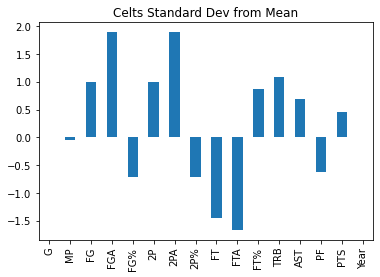

In [91]:
celtsVsavg['Std From Mean'].plot(kind='bar')
plt.title("Celts Standard Dev from Mean")

From this graph we can see that the three biggest differentiations from the mean for the Celtics during the 60s were FGA, FTA, and TRB


Let us now check to see if there was a significant height difference with the celtics vs the league average. The way we will do this is by getting all the players that played during the 60s to find league average height and check the championship teams of the celtics .

In [62]:
#The league average height

height60mean

77.2964509394572

I will scrape basketball reference to get all the players on the celtics of the 60s and use only the players that contributed significantly.

In [63]:
years = list(range(1960,1970))
url_start = "https://www.basketball-reference.com/teams/BOS/{}.html"

for year in years:
    url = url_start.format(year)    
    data = requests.get(url)
    
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Celts_Players_60s\{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [94]:
celtic_players_60s = []

years = list(range(1960,1970))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Celts_Players_60s\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="roster")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    celtic_players_60s.append(teams)
celtic_players_60s = pd.concat(celtic_players_60s)

In [65]:
celtic_players_60s

,No.,Player,Pos,Ht,Wt,Birth Date,Unnamed: 6,Exp,College,Year
0,17,Gene Conley,PF,6-8,225,"November 10, 1930",us,2,Washington State,1960
1,14,Bob Cousy,PG,6-1,175,"August 9, 1928",us,9,Holy Cross,1960
2,20,Gene Guarilia,SF,6-5,220,"September 13, 1937",us,R,George Washington,1960
3,"15, 20",Tom Heinsohn,PF,6-7,218,"August 26, 1934",us,3,Holy Cross,1960
4,25,K.C. Jones,PG,6-1,200,"May 25, 1932",us,1,San Francisco,1960
...,...,...,...,...,...,...,...,...,...,...
8,19,Don Nelson,SF,6-6,210,"May 15, 1940",us,6,Iowa,1969
9,29,Bud Olsen,PF,6-8,220,"July 25, 1940",us,6,Louisville,1969
10,6,Bill Russell,C,6-10,215,"February 12, 1934",us,12,San Francisco,1969
11,16,Tom Sanders,SF,6-6,210,"November 8, 1938",us,8,NYU,1969


In [67]:
celtic_players_60s = celtic_players_60s.assign(Ht = celtic_players_60s["Ht"].apply(lambda x:parse_ht(x)))

In [69]:
celtic_players_60s['Ht'].mean()

77.20967741935483

In [82]:
fg_pct = [league_avg_60s['FG%'].mean(), league_avg_70s['FG%'].mean(), league_avg_80s['FG%'].mean(), league_avg_90s['FG%'].mean(), league_avg_00s['FG%'].mean(), league_avg_10s['FG%'].mean()]

Text(0.5, 1.0, 'FG Pct by Decade')

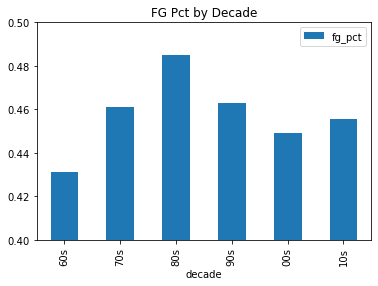

In [87]:
decade_lst = ['60s','70s','80s','90s','00s','10s']
fg_dict = dict(decade = decade_lst, fg_pct = fg_pct)

fg_pct_df = pd.DataFrame(fg_dict)
fg_pct_df.plot(kind='bar', ylim=(.4,.5), x = 'decade')
plt.title('FG Pct by Decade')

In [84]:
fg_pct.plot(kind='bar')

AttributeError: 'list' object has no attribute 'plot'

In [99]:
!pip install html5lib

In [102]:
#Getting Defensive Ratings for each of the Celtics teams of the decade.
celtic_misc_60s = []

years = list(range(1960,1970))
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Celts_Players_60s\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="all_team_misc")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    celtic_misc_60s.append(teams)
celtic_misc_60s = pd.concat(celtic_misc_60s)

ImportError: html5lib not found, please install it

In [8]:
years = list(range(1960,1970))
url_start = "https://www.basketball-reference.com/teams/BOS/{}.html"
celtic_misc_60s = []

for year in years:
    url = url_start.format(year)    
    page = requests.get(url)
    
    soup = BeautifulSoup(page.content,"html.parser")
    teams_table = soup.find(id="div_team_misc")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    celtic_misc_60s.append(teams)
celtic_misc_60s = pd.concat(celtic_misc_60s)

ValueError: No tables found

# 70s Deep Dive

Lets Scrape Basektball Reference again and get the season summary of each year of the 70s. 
This will provide a quick glance to see how each team performed and what set them apart. 

In [78]:
#Have to scrape three separate times due to how Basketball Reference has their site set up
years = list(range(1971,1980))

teams_70s = []

#Get Western Team
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="all_divs_standings_W")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    teams_70s.append(teams)
#Get Eastern Teams
for year in years:
    with open(r"C:\Users\kfiel\Data_Projects\NBA_Player_EDA\Teams_Each_Year\{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
    soup = BeautifulSoup(page,"html.parser")
    teams_table = soup.find(id="all_standings")
    teams = pd.read_html(str(teams_table))[0]
    teams["Year"] = year
    
    teams_70s.append(teams)
    
team_70s = pd.concat(teams_70s)

In [82]:
team_70s.rename(columns={'Western Conference': 'West', 'Eastern Conference':'East'}, inplace=True)
values = ['Midwest Division', 'Pacific Division', 'Atlantic Division', 'Central Division' ]
team_70s = team_70s[team_70s.West.isin(values) == False]

In [84]:
team_70s = team_70s[team_70s.East.isin(values) == False]
team_70s
#Delete all rows with division names

,West,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,East
1,Milwaukee Bucks*,66,16,.805,—,118.4,106.2,11.92,1971,NaN
2,Chicago Bulls*,51,31,.622,15.0,110.6,105.4,5.47,1971,NaN
3,Phoenix Suns,48,34,.585,18.0,113.8,111.9,2.33,1971,NaN
4,Detroit Pistons,45,37,.549,21.0,110.1,110.9,-0.33,1971,NaN
6,Los Angeles Lakers*,48,34,.585,—,114.8,111.7,3.27,1971,NaN
...,...,...,...,...,...,...,...,...,...,...
8,NaN,47,35,.573,1.0,113.4,112.4,0.92,1979,Houston Rockets*
9,NaN,46,36,.561,2.0,109.1,107.1,1.92,1979,Atlanta Hawks*
10,NaN,30,52,.366,18.0,110.0,112.7,-2.60,1979,Detroit Pistons
11,NaN,30,52,.366,18.0,106.5,110.2,-3.57,1979,Cleveland Cavaliers


In [125]:
team_70s.reset_index(drop=True)
team_70s['SRS'] = team_70s['SRS'].astype('float')

C:\Users\kfiel\AppData\Local\Temp\ipykernel_18280\1082119728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_70s['SRS'] = team_70s['SRS'].astype('float')


In [126]:
top20 = team_70s.sort_values(by=['SRS'], ascending=False).head(20)

In [127]:
top20.reset_index(drop=True)

,West,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,East
0,Milwaukee Bucks*,66,16,.805,—,118.4,106.2,11.92,1971,NaN
1,Los Angeles Lakers*,69,13,.841,—,121.0,108.7,11.65,1972,NaN
2,Milwaukee Bucks*,63,19,.768,—,114.6,103.5,10.70,1972,NaN
3,Los Angeles Lakers*,60,22,.732,—,111.7,103.2,8.16,1973,NaN
4,Chicago Bulls*,57,25,.695,6.0,111.2,102.9,7.91,1972,NaN
5,Milwaukee Bucks*,60,22,.732,—,107.2,99.0,7.84,1973,NaN
6,Milwaukee Bucks*,59,23,.720,—,107.1,99.0,7.61,1974,NaN
7,NaN,68,14,.829,—,112.7,104.5,7.35,1973,Boston Celtics*
8,NaN,60,22,.732,—,104.7,97.5,6.53,1975,Washington Bullets*
9,Golden State Warriors*,59,23,.720,—,109.8,103.1,6.23,1976,NaN


In [128]:
idx = (top20['West'].isnull())
top20.loc[idx,['West','East']] = top20.loc[idx,['East','West']].values

In [129]:
top20 = top20.drop(['East'], axis=1)
top20 = top20.rename(columns={'West':'Team'})

In [130]:
top20 = top20.reset_index(drop=True)

In [131]:
top20['Year'] = top20.Year.astype('string')
top20['Team/Yr'] = top20['Team'] + ' ' + top20['Year']
top20

,Team,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team/Yr
0,Milwaukee Bucks*,66,16,.805,—,118.4,106.2,11.92,1971,Milwaukee Bucks* 1971
1,Los Angeles Lakers*,69,13,.841,—,121.0,108.7,11.65,1972,Los Angeles Lakers* 1972
2,Milwaukee Bucks*,63,19,.768,—,114.6,103.5,10.70,1972,Milwaukee Bucks* 1972
3,Los Angeles Lakers*,60,22,.732,—,111.7,103.2,8.16,1973,Los Angeles Lakers* 1973
4,Chicago Bulls*,57,25,.695,6.0,111.2,102.9,7.91,1972,Chicago Bulls* 1972
5,Milwaukee Bucks*,60,22,.732,—,107.2,99.0,7.84,1973,Milwaukee Bucks* 1973
6,Milwaukee Bucks*,59,23,.720,—,107.1,99.0,7.61,1974,Milwaukee Bucks* 1974
7,Boston Celtics*,68,14,.829,—,112.7,104.5,7.35,1973,Boston Celtics* 1973
8,Washington Bullets*,60,22,.732,—,104.7,97.5,6.53,1975,Washington Bullets* 1975
9,Golden State Warriors*,59,23,.720,—,109.8,103.1,6.23,1976,Golden State Warriors* 1976


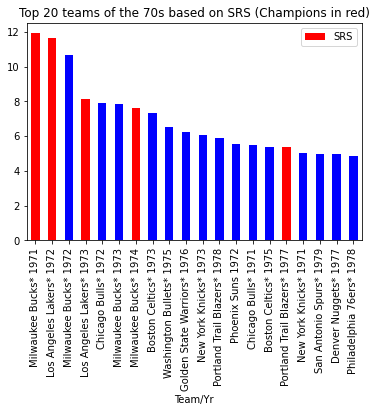

In [136]:
champions = ['red', 'red', 'blue', 'red', 'blue', 'blue', 'red', 'blue','blue','blue',
             'blue','blue','blue','blue','blue','red','blue','blue','blue','blue']
ax = top20.plot(kind='bar', x='Team/Yr', y='SRS', color=champions, title="Top 20 teams of the 70s based on SRS (Champions in red)")



In [138]:
champs_70s = {'Teams':['70 Knicks', '71 Bucks', '72 Lakers', '73 Knicks', '74 Celtics', '75 Warriors', 
                       '76 Celtics', '77 Blazers', '78 Bullets', '79 Sonics'],
              'DRtg': [1,1,1,4,6,5,3,5,9,1],
              'ORtg': [5,1,2,3,5,2,6,2,10,14]}

In [139]:
df_champs = pd.DataFrame.from_dict(champs_70s)

In [141]:
df_champs

,Teams,DRtg,ORtg
0,70 Knicks,1,5
1,71 Bucks,1,1
2,72 Lakers,1,2
3,73 Knicks,4,3
4,74 Celtics,6,5
5,75 Warriors,5,2
6,76 Celtics,3,6
7,77 Blazers,5,2
8,78 Bullets,9,10
9,79 Sonics,1,14


# 80s Deep Dive


In [159]:
league_avg_60s['PPG'] = league_avg_60s['PTS'].div(82)
league_avg_70s['PPG'] = league_avg_70s['PTS'].div(82)
league_avg_80s['PPG'] = league_avg_80s['PTS'].div(82)
league_avg_90s['PPG'] = league_avg_90s['PTS'].div(82)
league_avg_00s['PPG'] = league_avg_00s['PTS'].div(82)
league_avg_10s['PPG'] = league_avg_10s['PTS'].div(82)

C:\Users\kfiel\AppData\Local\Temp\ipykernel_18280\3634868321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_avg_60s['PPG'] = league_avg_60s['PTS'].div(82)
C:\Users\kfiel\AppData\Local\Temp\ipykernel_18280\3634868321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_avg_70s['PPG'] = league_avg_70s['PTS'].div(82)
C:\Users\kfiel\AppData\Local\Temp\ipykernel_18280\3634868321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [160]:
league_avg_00s

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,PPG
29,NaN,League Average,82,19802,3020,6732,0.449,397,1125,0.353,...,2501,3519,1832,651,424,1269,1911,7993,2000,97.475610
29,NaN,League Average,82,19846,2926,6609,0.443,397,1124,0.354,...,2499,3482,1786,641,431,1234,1833,7774,2001,94.804878
29,NaN,League Average,82,19816,2966,6664,0.445,428,1209,0.354,...,2474,3477,1798,639,428,1186,1741,7829,2002,95.475610
29,NaN,League Average,82,19842,2929,6624,0.442,421,1204,0.349,...,2481,3469,1763,651,411,1223,1784,7797,2003,95.085366
29,NaN,League Average,82,19820,2871,6545,0.439,425,1224,0.347,...,2469,3461,1747,650,415,1228,1759,7659,2004,93.402439
30,NaN,League Average,82,19833,2948,6588,0.447,459,1292,0.356,...,2448,3432,1745,616,399,1189,1856,7970,2005,97.195122
30,NaN,League Average,82,19852,2939,6477,0.454,470,1310,0.358,...,2442,3358,1690,588,385,1182,1866,7955,2006,97.012195
30,NaN,League Average,82,19858,2995,6536,0.458,498,1389,0.358,...,2454,3366,1746,594,378,1241,1822,8097,2007,98.743902
30,NaN,League Average,82,19803,3056,6683,0.457,537,1485,0.362,...,2524,3442,1784,597,388,1157,1724,8194,2008,99.926829
30,NaN,League Average,82,19822,3044,6635,0.459,545,1486,0.367,...,2481,3386,1720,596,394,1151,1726,8196,2009,99.951220


In [161]:
ppg60mean = league_avg_60s['PPG'].mean()
ppg70mean = league_avg_70s['PPG'].mean()
ppg80mean = league_avg_80s['PPG'].mean()
ppg90mean = league_avg_90s['PPG'].mean()
ppg00mean = league_avg_00s['PPG'].mean()
ppg10mean = league_avg_10s['PPG'].mean()

<AxesSubplot:title={'center':'PPG by Decade'}>

<Figure size 720x720 with 0 Axes>

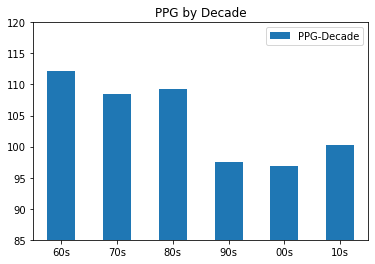

In [169]:
fig=plt.figure(figsize=(10,10))
ppg_dec = [ppg60mean, ppg70mean, ppg80mean, ppg90mean, ppg00mean, ppg10mean]
index = ['60s','70s','80s','90s','00s','10s']
ppg_df = pd.DataFrame({'PPG-Decade': ppg_dec}, index=index)

ppg_df.plot.bar(rot=0, ylim= [85, 120], title="PPG by Decade")


In [171]:
champs_80s = {'Teams':['80 Lakers', '81 Celtics', '82 Lakers', '83 76ers', '84 Celtics', '85 Lakers',
                      '86 Celtics', '87 Lakers', '88 Lakers', '89 Pistons'],
              'DRtg': [9,4,10,5,3,7,1,7,9,3],
              'ORtg': [1,5,2,5,6,1,3,1,2,7]}
df_champs = pd.DataFrame.from_dict(champs_80s)
df_champs

,Teams,DRtg,ORtg
0,80 Lakers,9,1
1,81 Celtics,4,5
2,82 Lakers,10,2
3,83 76ers,5,5
4,84 Celtics,3,6
5,85 Lakers,7,1
6,86 Celtics,1,3
7,87 Lakers,7,1
8,88 Lakers,9,2
9,89 Pistons,3,7
